### Outline

- <b> Read Dataset </b>
- <b> Data Cleaning </b>
    - Outliers
    - Uncorrelated columns
    - Filling null values
    
- <b> Data Visulaization </b>

- <b> Model Preparation </b>
    - Encoding categorical variables
    - Normalization 
    - Split Training and testing
  
- <b> Model Evaluation </b>
    - Confusion Matrix
    - Precision
    - Recall
    - F1 Score


## 1. Read Dataset

In [572]:
import os
import pandas as pd

In [573]:
path = "E:/MachineLearning/MobilePriceClassification/Dataset/"

In [574]:
df_train = pd.read_csv(os.path.join(path,'train.csv'))
df_test = pd.read_csv(os.path.join(path,'test.csv'))

In [575]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [576]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [577]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [578]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [579]:
df_test.shape

(1000, 21)

## 2. Data Cleaning
- Outliers
- Uncorrelated columns
- Filling null values

### 2.1 Outliers

In [580]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


We can see almost all the features are perfect.

In [581]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 864x720 with 0 Axes>

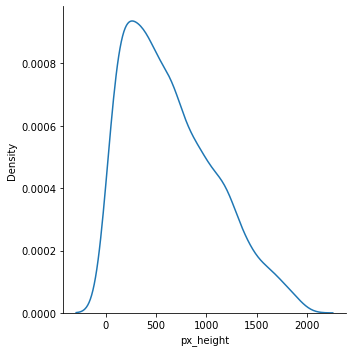

In [582]:
plt.figure(figsize = (12,10));
sns.displot(x = df_train['px_height'], kind= 'kde');

There is no such outliers, it seems

.

###  2.2 Uncorrelated Columns

.

In [583]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [584]:
corr = df_train.corr()

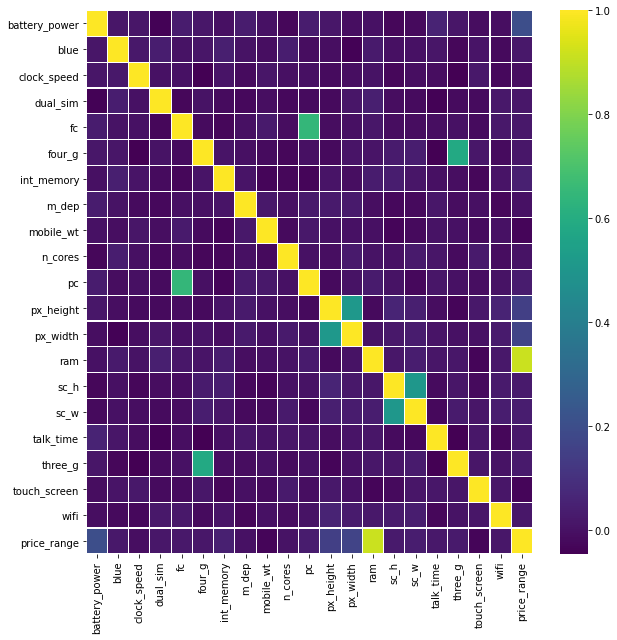

In [585]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(corr, ax = ax, cmap = 'viridis',linewidth = 0.1);

From the above figure, we can observe that, 
- <b> ram </b> has higher correlation with <b>  price_range   </b> which is obviously true. 
- <b>   pc_width  </b> & <b>  pc_height   </b> is also correlated with price_range, surprisingly.
- <b>    battery_power </b> 
- However, <b> four_g </b>, <b> touch_screen </b> and <b> int_memory </b> has lower correlation.

In [586]:
df_train['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

### 2.3 Filling null values

In [587]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [588]:
df_test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

As we can see there are no<b>    'nan' </b>values

## 3. Data Visualization


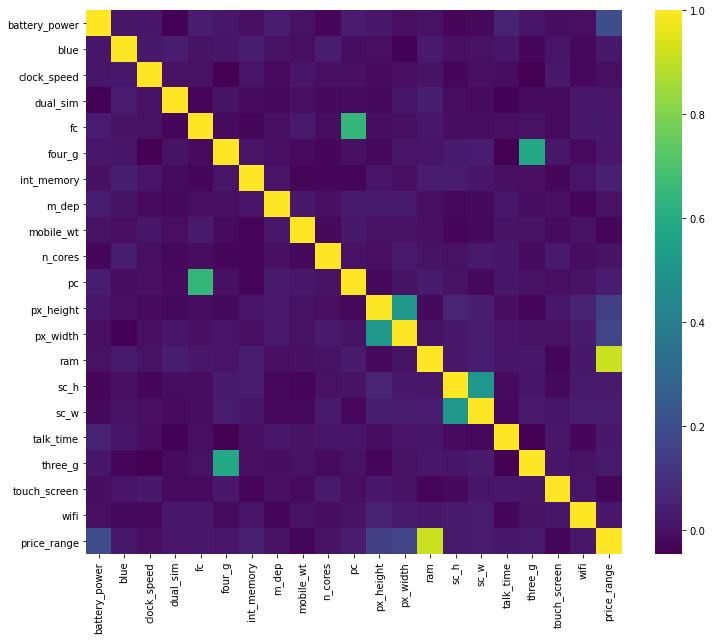

In [589]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(corr, ax = ax, cmap = 'viridis');


- <b>  price_range   </b>
- <b>  ram   </b>
- <b>  battery_power   </b>
- <b> touch_screen </b>
- <b>    four_g </b>
- <b>   three_g  </b>
- <b>   px_height  </b>
- <b> px_weight </b>
- <b> wifi </b>

Checking on these features

In [590]:
df_train['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

### Ram

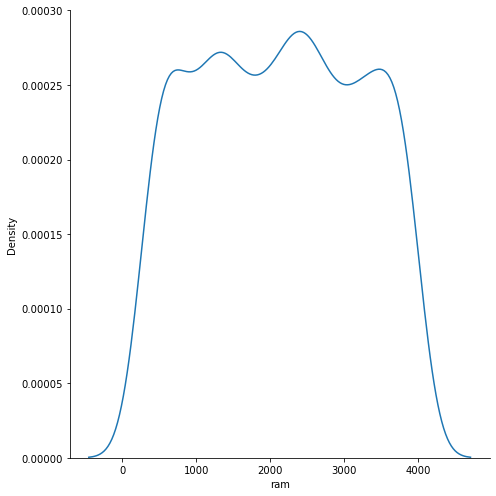

In [591]:
sns.displot( x = 'ram', data = df_train, kind = 'kde', height = 7, aspect = 1);

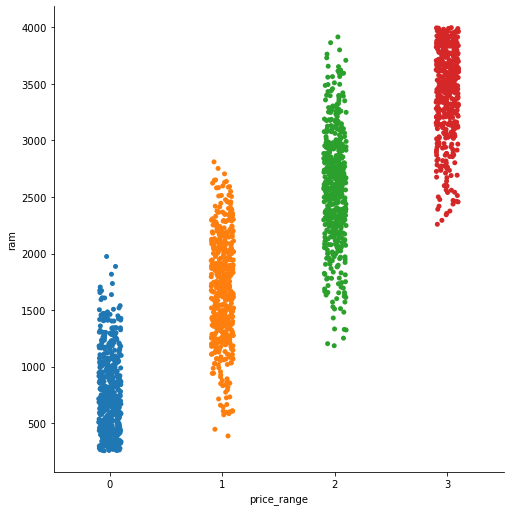

In [592]:
sns.catplot(y = 'ram',x = 'price_range',data = df_train, height = 7, aspect = 1);

Offcourse, lower the ram lower the price. Higher the ram higher the price.

### battery_power

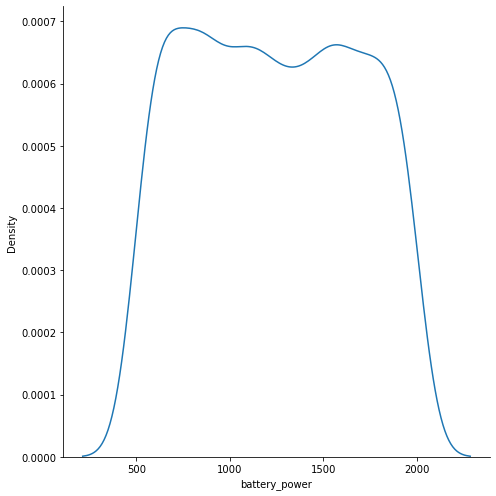

In [593]:
sns.displot(x = 'battery_power', data = df_train, kind = 'kde', height = 7, aspect = 1);

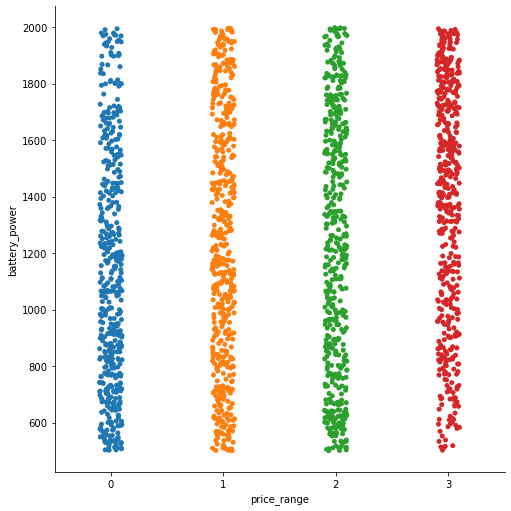

In [594]:
sns.catplot(y = 'battery_power', x = 'price_range', data = df_train, aspect = 1, height = 7);

From the figure, we can say that:
- The <b> blue plots i.e or lower price range </b> has more number of data distributed on <b> battery_power 600-1000 </b> 
- Whereas, <b> the red points or higher price range </b> has more datas distributed on <b> battery_power 1400-2000 </b>

### touch_screen

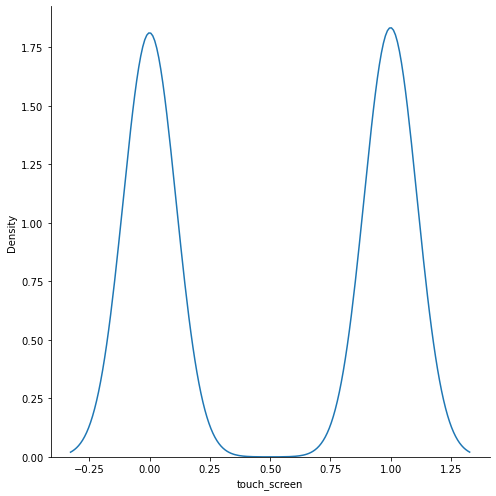

In [595]:
sns.displot(df_train['touch_screen'], kind = 'kde', aspect = 1, height = 7);

In [596]:
df_train['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

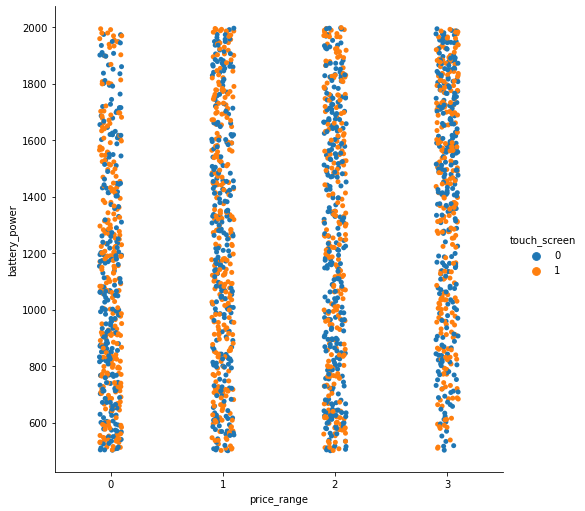

In [597]:
sns.catplot(y = 'battery_power', x = 'price_range', hue = 'touch_screen', data = df_train, aspect = 1, height = 7);

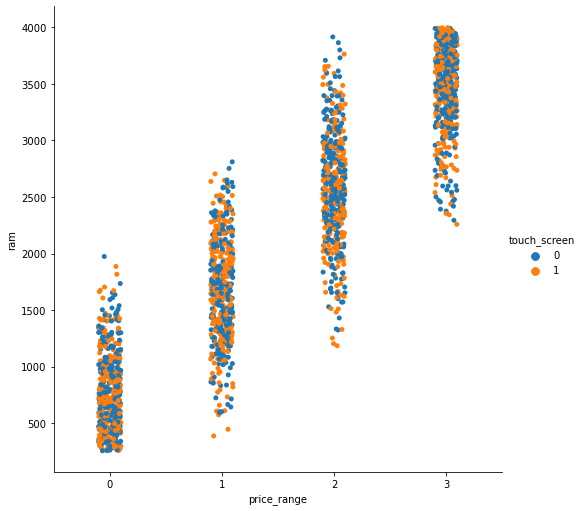

In [598]:
sns.catplot(y = 'ram',x = 'price_range', hue = 'touch_screen',data = df_train, height = 7, aspect = 1);

<b> touch_screen </b> is equally distributed on all price range. We don't see anything here.

### four_g

In [599]:
df_train['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

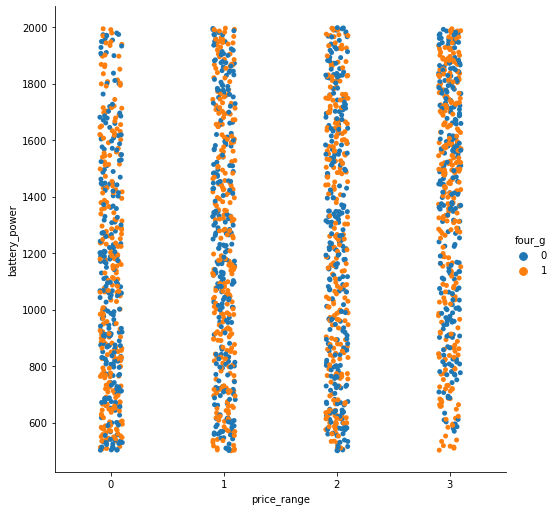

In [600]:
sns.catplot(y = 'battery_power', x = 'price_range', hue = 'four_g', data = df_train, aspect = 1, height = 7);

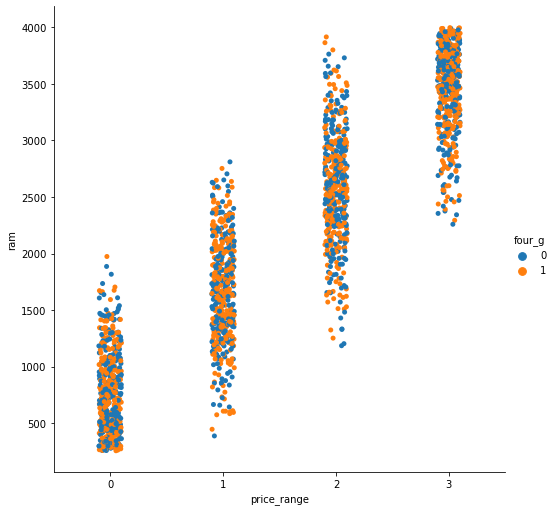

In [601]:
sns.catplot(y = 'ram',x = 'price_range', hue = 'four_g',data = df_train, height = 7, aspect = 1);

In [602]:
labels = ["4G-supported", "Not supported"]
values = df_train['four_g'].value_counts().values

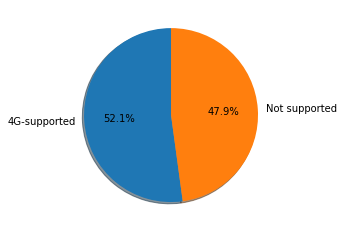

In [603]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.show()

### three_g

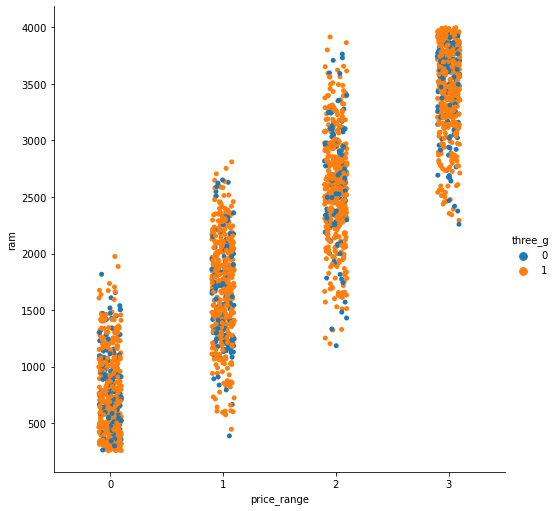

In [604]:
sns.catplot(y = 'ram',x = 'price_range', hue = 'three_g',data = df_train, height = 7, aspect = 1);

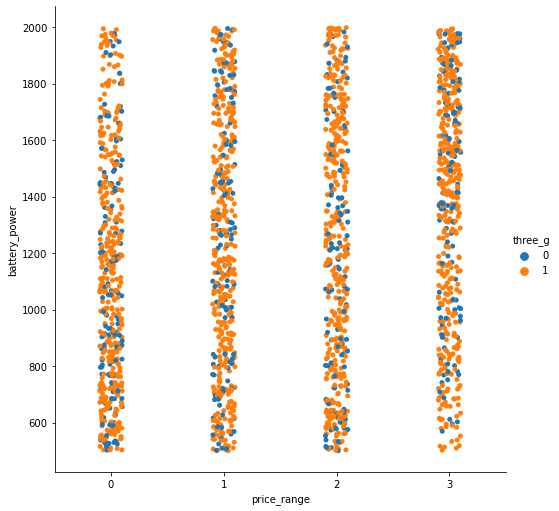

In [605]:
sns.catplot(y = 'battery_power', x = 'price_range', hue = 'three_g', data = df_train, aspect = 1, height = 7);

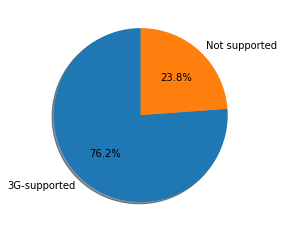

In [606]:
labels3g = ["3G-supported","Not supported"]
values3g = df_train['three_g'].value_counts().values
fig1,ax1 = plt.subplots()
ax1.pie(values3g, labels = labels3g, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.show()

### px_height and px_weight

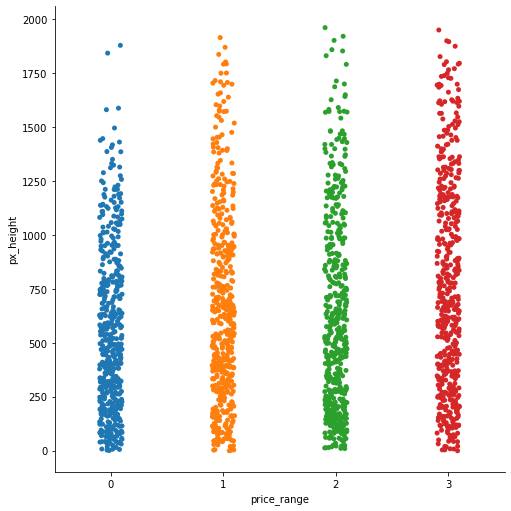

In [607]:
sns.catplot(x = 'price_range', y = 'px_height', data = df_train, aspect = 1, height = 7);

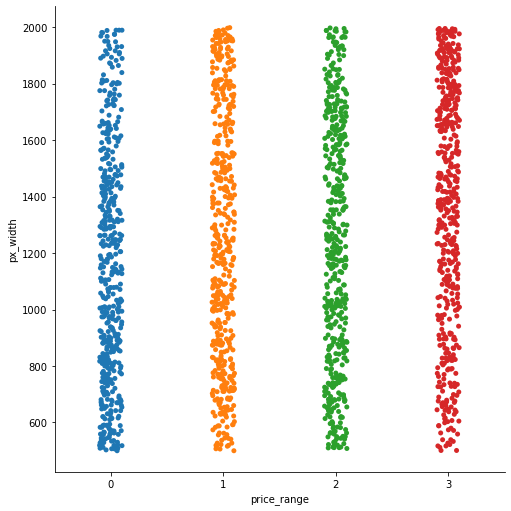

In [608]:
sns.catplot(x = 'price_range', y = 'px_width', data = df_train, aspect = 1, height = 7);

### fc (front_camera)

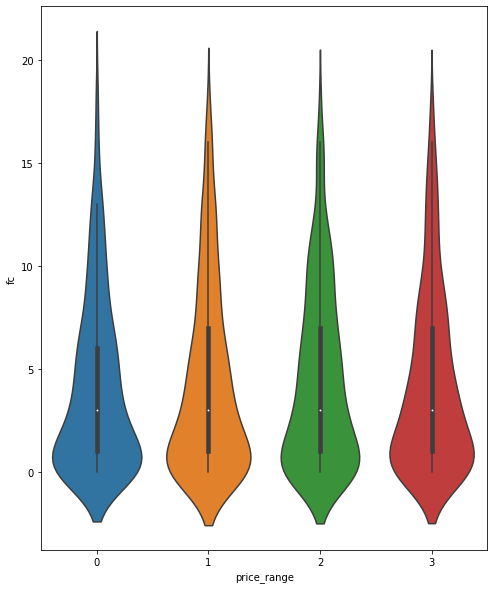

In [609]:
ax = plt.figure(figsize = (8,10))
sns.violinplot(x = 'price_range', y = 'fc', data = df_train);

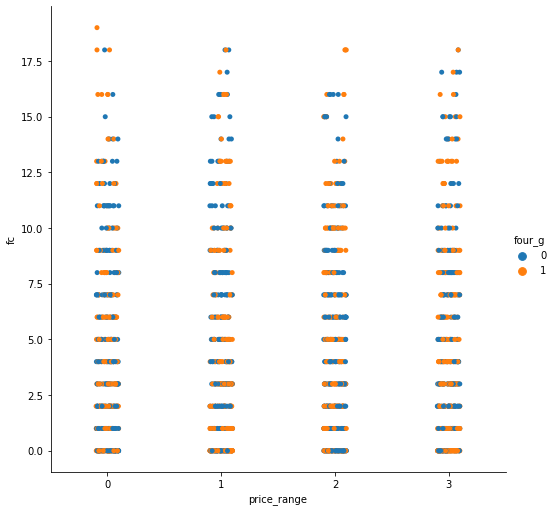

In [610]:
sns.catplot(x = 'price_range', y = 'fc',hue = 'four_g', data = df_train, aspect = 1, height = 7);

### int_memory

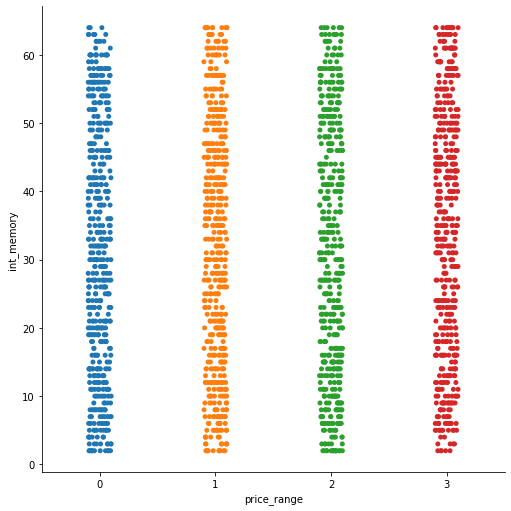

In [611]:
sns.catplot(x = 'price_range', y ='int_memory', data = df_train, aspect = 1, height = 7);

### wifi

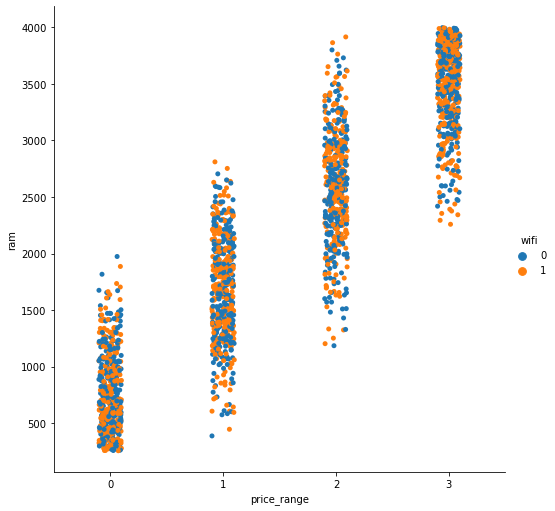

In [612]:
sns.catplot(y = 'ram',x = 'price_range', hue = 'wifi',data = df_train, height = 7, aspect = 1);

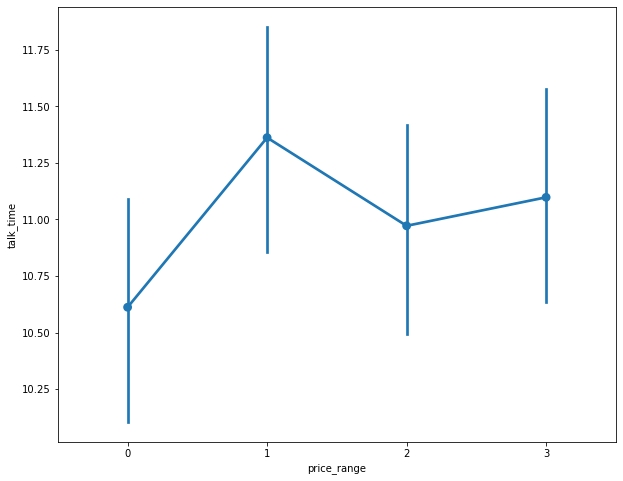

In [613]:
fig = plt.figure(figsize = (10,8))
sns.pointplot(y = "talk_time", x = "price_range", data = df_train);

As we don't see anything interesting, we will prepare for Modeling

# Model Preparation
- Encoding categorical variables
- Normalization
- Split training and testing

### Encoding categorical variables

In [614]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

As we can see, there are no any string values which need to be converted on numeric.

### Normalization

In [615]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Let's analyze the prediction of the alogritm with and without Normalization

In [616]:
dfx_train = df_train.copy()

In [617]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [618]:
std_scaler = StandardScaler()

for column in ['battery_power','int_memory','mobile_wt','px_height','px_width','ram']:
    df_train[column] = std_scaler.fit_transform(df_train[column].values.reshape(-1,1))

In [619]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,0,2.2,0,1,0,-1.380644,0.6,1.349249,2,...,-1.408949,-1.146784,0.391703,9,7,19,0,0,1,1
1,-0.495139,1,0.5,1,0,1,1.155024,0.7,-0.120059,3,...,0.585778,1.704465,0.467317,17,3,7,1,1,0,2
2,-1.537686,1,0.5,1,2,1,0.493546,0.9,0.134244,5,...,1.392684,1.074968,0.441498,11,2,9,1,1,0,2
3,-1.419319,1,2.5,0,0,0,-1.215274,0.8,-0.261339,6,...,1.286750,1.236971,0.594569,16,8,11,1,0,0,2
4,1.325906,1,1.2,0,13,1,0.658915,0.6,0.021220,2,...,1.268718,-0.091452,-0.657666,8,2,15,1,1,0,1


### Split training and testing

In [620]:
from sklearn.model_selection import train_test_split

In [621]:
## Split training and testing

X_train, X_test, y_train, y_test = train_test_split(df_train.drop('price_range', axis = 1), df_train['price_range'], test_size = 0.30, random_state = 141)

In [622]:
X2_train,X2_test, y2_train, y2_test = train_test_split(dfx_train.drop('price_range',axis = 1), dfx_train['price_range'], test_size = 0.30, random_state = 141)

## Models and tuning

Since it is classification problem, we will test it with following algorithms:
- <b> Logistic Regression </b>
- <b> Naive Bayes
- K-Nearest Neighbour
- Decision Tree
- Random Forest
- Support Vector Machine </b>

We are going to create and train several machine learning models to see their performance in this used car dataset for price prediction

We use <b> F1 Score, Precision, Recall, ROC Curve, Confusion Matrix </b> and <b> PR Curve </b> as the way to evaluate our models

In [623]:
model_score = pd.DataFrame(columns = ('Accuracy', 'rmse'))

### Logistic Regression

In [624]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
import math

In [625]:
lrmodel = LogisticRegression()

In [626]:
lrmodel.fit(X_train, y_train)

C:\Users\basto\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [627]:
lrmodel.score(X_test,y_test)

0.9283333333333333

In [628]:
## Without normalization

In [629]:
lrmodel2 = LogisticRegression()

In [630]:
lrmodel2.fit(X2_train, y2_train)

C:\Users\basto\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [631]:
lrmodel2.score(X2_test, y2_test)

0.6516666666666666

### Naive Bayes

In [632]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [633]:
naiveb = GaussianNB()

In [634]:
naiveb.fit(X_train, y_train)

GaussianNB()

In [635]:
naiveb.score(X_test, y_test)

0.8133333333333334

### K-Nearest Neighbour

In [636]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [637]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn2 = KNeighborsClassifier(n_neighbors = 7)

In [638]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [639]:
knn.score(X_test, y_test)

0.30333333333333334

In [640]:
## Without normalization
knn2.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=7)

In [641]:
knn2.score(X2_test, y2_test)

0.9183333333333333

In [642]:
### Elbow Method for optimum values of K

In [643]:
error_rate = []

for i in range(1,20):
    knnx = KNeighborsClassifier(n_neighbors = i)
    knnx.fit(X2_train, y2_train)
    pred_i = knnx.predict(X2_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

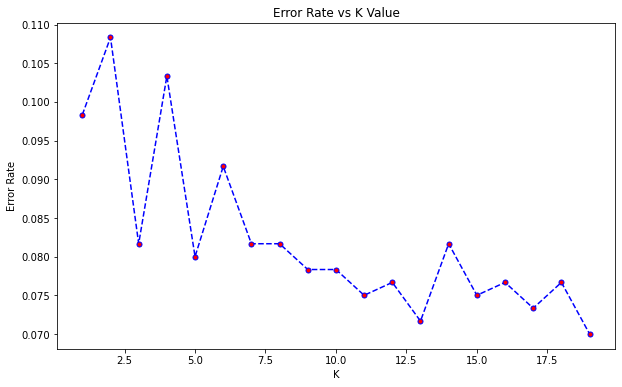

In [644]:
plt.figure(figsize = (10,6))
plt.plot(range(1,20), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o',
        markerfacecolor = 'red', markersize = 5);
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

### Decision Tree

In [645]:
from sklearn.tree import DecisionTreeClassifier

In [646]:
dt = DecisionTreeClassifier()

In [647]:
dt = dt.fit(X_train, y_train)

In [648]:
y_pred = dt.predict(X_test)

In [649]:
print("Accuracy", metrics.accuracy_score(y_test, y_pred))

Accuracy 0.84


In [650]:
dt.score(X_test, y_test)

0.84

In [651]:
## Without normalization

In [652]:
dt.fit(X2_train,y2_train)

DecisionTreeClassifier()

In [653]:
dt.score(X2_test, y2_test)

0.82

### Random Forest

In [654]:
from sklearn.ensemble import RandomForestClassifier

In [655]:
rfclf = RandomForestClassifier(n_estimators = 100)


In [656]:
rfclf.fit(X_train, y_train)

RandomForestClassifier()

In [657]:
rfclf.score(X_test, y_test)

0.8716666666666667

In [658]:
y_pred = rfclf.predict(X_test)

In [659]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8716666666666667


In [660]:
# Without normalization

In [661]:
rfclf.fit(X2_train, y2_train)

RandomForestClassifier()

In [662]:
rfclf.score(X2_test, y2_test)

0.8766666666666667

In [663]:
rfclf.score(X_test,y_test)

0.2833333333333333

### Support Vector Machine

In [664]:
from sklearn import svm

In [665]:
clf  = svm.SVC(kernel='linear')


In [666]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [667]:
clf.score(X_test, y_test)

0.945

In [668]:
## Without normalization

In [669]:
clf2 = svm.SVC(kernel='linear')

In [670]:
clf2.fit(X2_train, y2_train)

SVC(kernel='linear')

In [671]:
clf.score(X2_test, y2_test)

0.23666666666666666

### Linear Regression

In [672]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm2 = LinearRegression()

In [673]:
lm.fit(X_train, y_train)

LinearRegression()

In [674]:
lm.score(X_test, y_test)

0.9127061782263051

In [675]:
### Without normalization

In [676]:
lm2.fit(X2_train, y2_train)

LinearRegression()

In [677]:
lm2.score(X2_test, y2_test)

0.9127061782263051

### Conclusion: KNN & Linear Regression performed the best

##### Linear Regression

In [678]:
y_pred = lm.predict(X_test)

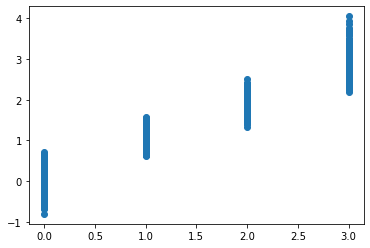

In [679]:
plt.scatter(y_test, y_pred);

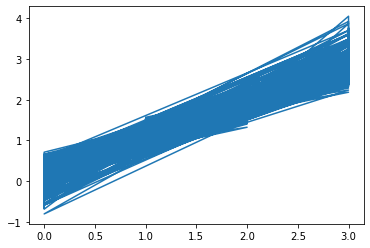

In [680]:
plt.plot(y_test, y_pred);

## Result: KNN

Since KNN result much better without normalizing so we are doing all with <b> X2 or Y2 test and train </b>

In [681]:
from sklearn.metrics import classification_report, confusion_matrix

In [686]:
pred = knn2.predict(X2_test)

In [692]:
print(classification_report(y2_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       170
           1       0.87      0.94      0.90       135
           2       0.90      0.85      0.88       153
           3       0.92      0.92      0.92       142

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



In [690]:
matrix = confusion_matrix(y2_test, pred)
print(matrix)

[[163   7   0   0]
 [  5 127   3   0]
 [  0  12 130  11]
 [  0   0  11 131]]


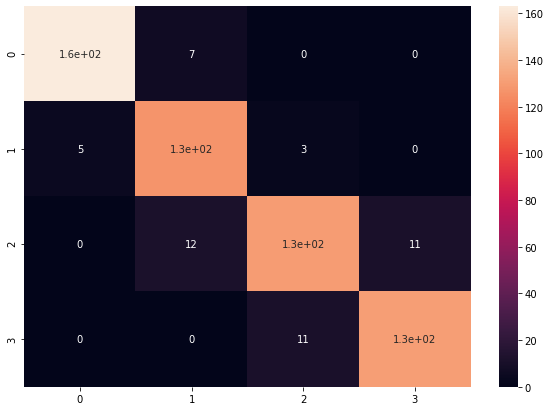

In [691]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot = True);

# Price prediction of Test.csv Using KNN for Prediction

In [693]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [694]:
df_test = df_test.drop('id', axis = 1)

In [695]:
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


### Model

In [696]:
predicted_price = knn2.predict(df_test)

In [697]:
predicted_price

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       1, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 2, 1, 3, 2, 0, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 3, 1, 2, 0, 2, 3, 1,

## Adding Predicted price to test.csv

In [698]:
df_test['price_range'] = predicted_price

In [699]:
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
